<a href="https://colab.research.google.com/github/SivapriyaVenkateswarar/BookIntel/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA COLLECTION



In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

ds = load_dataset("deepmind/narrativeqa")

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/18 [00:00<?, ?it/s]

# OVERALL DATA ANALYSIS

In [ ]:
print("Type of Dataset:")
print(type(ds))

Type of Dataset:
<class 'datasets.dataset_dict.DatasetDict'>


In [ ]:
print(ds.keys())

dict_keys(['train', 'test', 'validation'])


In [ ]:
print("Size of Train Dataset:")
print(len(ds["train"]))
print("Size of Test Dataset:")
print(len(ds["test"]))
print("Size of Test Dataset:")
print(len(ds["validation"]))
print("Size of the total Dataset:")
print(len(ds["validation"])+len(ds["test"])+len(ds["train"]))

Size of Train Dataset:
32747
Size of Test Dataset:
10557
Size of Test Dataset:
3461
Size of the total Dataset:
46765


# DATASET VISUALISATION

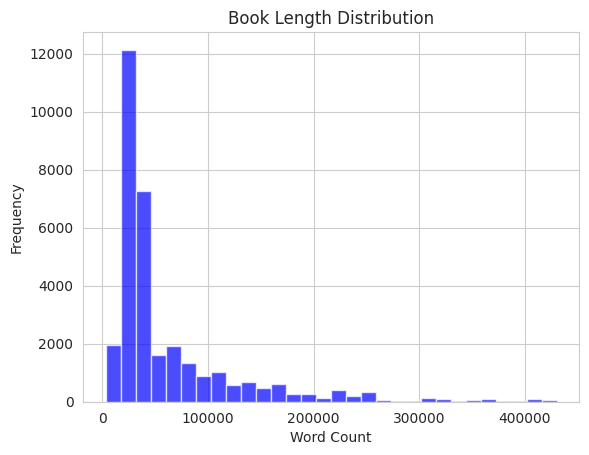

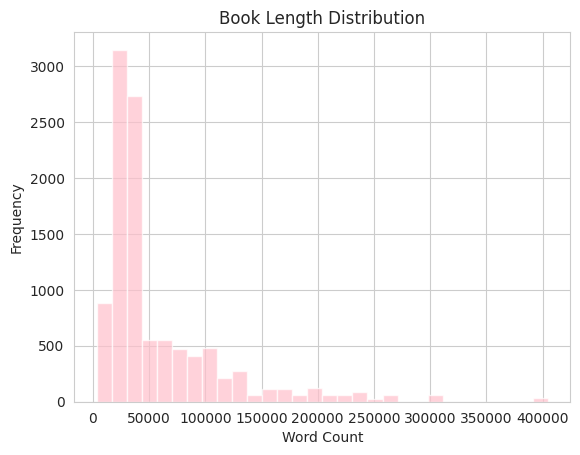

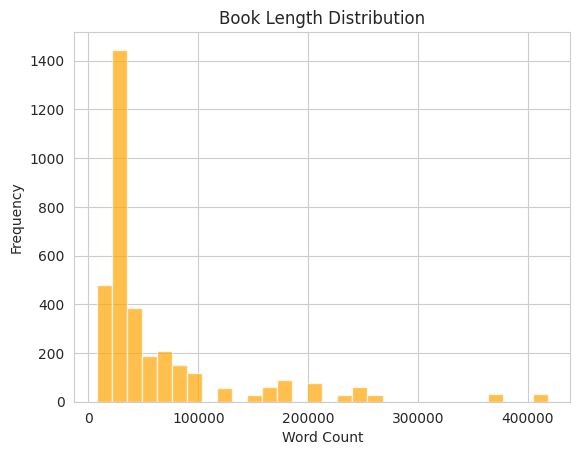

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Efficiently get word counts using the precomputed field
word_counts = np.array([row["document"]["word_count"] for row in ds["train"]])

plt.hist(word_counts, bins=30, color='blue', alpha=0.7)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Book Length Distribution")
plt.show()

word_counts = np.array([row["document"]["word_count"] for row in ds["test"]])

plt.hist(word_counts, bins=30, color='pink', alpha=0.7)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Book Length Distribution")
plt.show()

word_counts = np.array([row["document"]["word_count"] for row in ds["validation"]])

plt.hist(word_counts, bins=30, color='orange', alpha=0.7)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Book Length Distribution")
plt.show()

# DATA QUALITY CHECKS

In [ ]:
ds["train"].filter(lambda x: any(v is None for v in x.values()))

Dataset({
    features: ['document', 'question', 'answers'],
    num_rows: 0
})

In [ ]:
from collections import Counter

def find_duplicates(doc_ids, dataset_name):
    """Find and print duplicate document IDs in a dataset split."""
    duplicate_values = [item for item, count in Counter(doc_ids).items() if count > 1]

    print(f"\nDuplicate values in {dataset_name} set:")
    if duplicate_values:
        print(f"Total Duplicates: {len(duplicate_values)}")
        print("Some Duplicate IDs:", duplicate_values[:5])  # Show first 5 for brevity
    else:
        print("No duplicates found.")

# Train set
doc_ids_train = [sample["document"]["id"] for sample in ds["train"]]
find_duplicates(doc_ids_train, "train")

# Test set
doc_ids_test = [sample["document"]["id"] for sample in ds["test"]]
find_duplicates(doc_ids_test, "test")

# Validation set
doc_ids_validation = [sample["document"]["id"] for sample in ds["validation"]]
find_duplicates(doc_ids_validation, "validation")



Duplicate values in train set:
Total Duplicates: 1102
Some Duplicate IDs: ['0029bdbe75423337b551e42bb31f9a102785376f', '00936497f5884881f1df23f4834f6739552cee8b', '00950a3641e6a28b04a6fabf6334140e2deaa9fd', '00ee9e01a0e581e0d8cbf7e865a895147c480c5e', '00f9dbb0a851bc6099d5216e5fa8719b2ac3b82b']

Duplicate values in test set:
Total Duplicates: 355
Some Duplicate IDs: ['0025577043f5090cd603c6aea60f26e236195594', '014de1a8802c05ff64efa047e9290fb7fccea2b4', '019a9611dd8e1b822bd0a58f075cc4a30bdd0797', '020773a0ca71155173ec4affe6a2496a6cb45216', '0269408ac78193a0e13f1033bec6f658b00437b3']

Duplicate values in validation set:
Total Duplicates: 115
Some Duplicate IDs: ['00fb61fa7bee266ad995e52190ebb73606b60b70', '01502137e4276712d118bd4bdaf481c89aed163b', '042bb7019f583cebe3290795149fdc70412ad813', '08373775c3d82d8bbf4ff286a3a0076a3627c652', '087c29795e06ed5b8e29361606c12b6390db9270']


# STATISTICAL ANALYSIS

In [ ]:
import numpy as np

print("Train Set:")
text_lengths = [len(sample["document"]["text"]) for sample in ds["train"]]
print(f"Mean: {np.mean(text_lengths)}, Median: {np.median(text_lengths)}, Max: {max(text_lengths)}")
print("\n")
print("Test Set:")
text_lengths = [len(sample["document"]["text"]) for sample in ds["test"]]
print(f"Mean: {np.mean(text_lengths)}, Median: {np.median(text_lengths)}, Max: {max(text_lengths)}")
print("\n")
print("Validation Set:")
text_lengths = [len(sample["document"]["text"]) for sample in ds["validation"]]
print(f"Mean: {np.mean(text_lengths)}, Median: {np.median(text_lengths)}, Max: {max(text_lengths)}")


Train Set:
Mean: 342990.0717622988, Median: 248116.0, Max: 2027838


Test Set:
Mean: 326199.5065833097, Median: 252633.0, Max: 1874086


Validation Set:
Mean: 340469.0390060676, Median: 230573.0, Max: 1960965


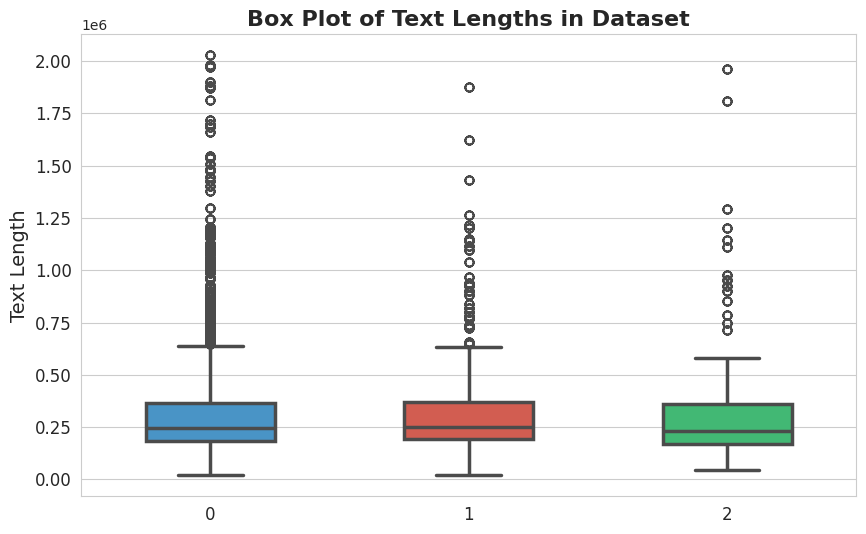

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_lengths = [len(sample["document"]["text"]) for sample in ds["train"]]
test_lengths = [len(sample["document"]["text"]) for sample in ds["test"]]
val_lengths = [len(sample["document"]["text"]) for sample in ds["validation"]]

data = [train_lengths, test_lengths, val_lengths]
labels = ["Train", "Test", "Validation"]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=data, palette=["#3498db", "#e74c3c", "#2ecc71"], width=0.5, linewidth=2.5,
            flierprops=dict(marker='o', color='black', alpha=0.7))

plt.ylabel("Text Length", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Box Plot of Text Lengths in Dataset", fontsize=16, fontweight="bold")

plt.show()


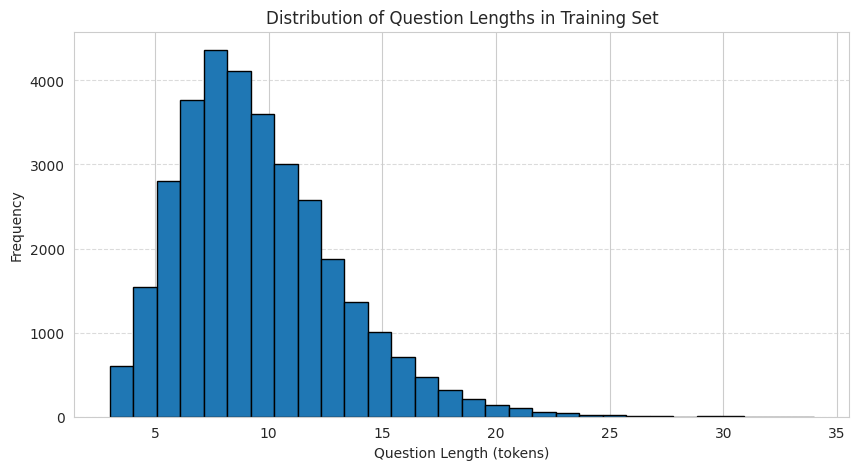

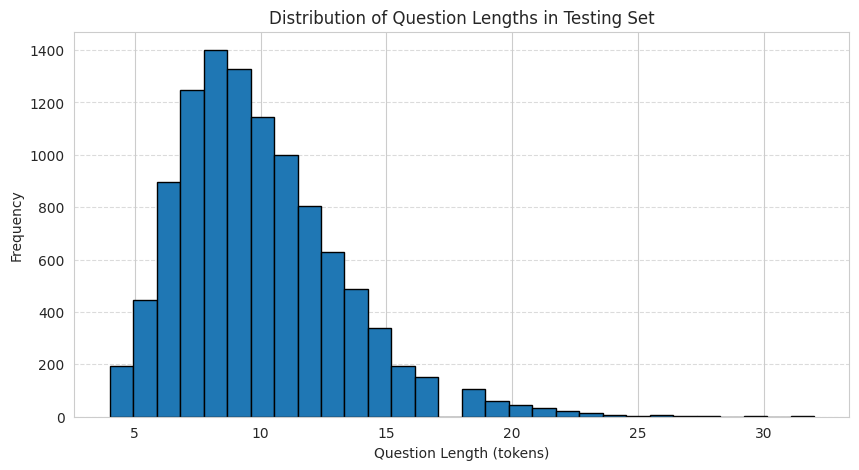

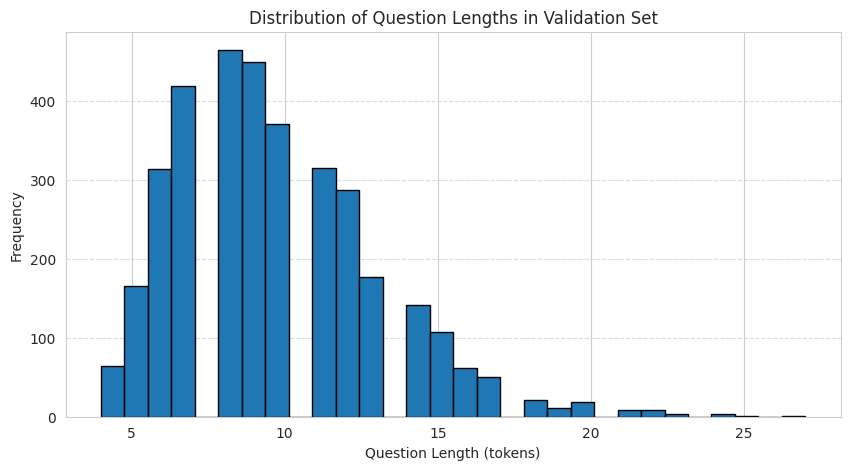

In [ ]:
import matplotlib.pyplot as plt

# Training set
token_counts = [len(sample["question"]["tokens"]) for sample in ds["train"]]

plt.figure(figsize=(10, 5))
plt.hist(token_counts, bins=30, edgecolor="black")
plt.xlabel("Question Length (tokens)")
plt.ylabel("Frequency")
plt.title("Distribution of Question Lengths in Training Set")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Test Set
token_counts = [len(sample["question"]["tokens"]) for sample in ds["test"]]

plt.figure(figsize=(10, 5))
plt.hist(token_counts, bins=30, edgecolor="black")
plt.xlabel("Question Length (tokens)")
plt.ylabel("Frequency")
plt.title("Distribution of Question Lengths in Testing Set")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Validation Set
token_counts = [len(sample["question"]["tokens"]) for sample in ds["validation"]]

plt.figure(figsize=(10, 5))
plt.hist(token_counts, bins=30, edgecolor="black")
plt.xlabel("Question Length (tokens)")
plt.ylabel("Frequency")
plt.title("Distribution of Question Lengths in Validation Set")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

